In [ ]:
using Pkg
# wird weiter unten verwendet
environmentName = "04_Ex4"
Pkg.activate(joinpath(dirname(pwd()), "conf", environmentName))
Pkg.instantiate();

In [2]:
using SparseArrays, Graphs, LinearAlgebra, Plots, GraphPlot;

In [3]:
using JSON3

data = JSON3.read(read(joinpath(dirname(pwd()), "data", "02-networks", "graph.json")))
print(string(length(data)))

673

In [4]:
pages = []
categories = []

# verwende nur die ersten 25 pages, damit der Graph nicht zu groß wird
for page in data[1:25]
    if haskey(page, :categories) && length(page.categories) > 0
        push!(pages, page.name)
        for category in page.categories
            push!(categories, category)
        end
    end
end

categories = unique(categories);

In [5]:
pages

25-element Vector{Any}:
 "Data_science"
 "Data_acquisition"
 "Data_ecosystem"
 "Data_archaeology"
 "Data_cooperative"
 "Data_editing"
 "Computational_science"
 "Data_cleansing"
 "Data_anonymization"
 "Data_curation"
 ⋮
 "Data_farming"
 "Data_governance"
 "Data_exploration"
 "Data_lineage"
 "Data_loading"
 "Data_loss"
 "Data_integrity"
 "Data_fusion"
 "Data_management"

In [6]:
categories

108-element Vector{Any}:
 "Articles_with_short_description"
 "Short_description_is_different_from_Wikidata"
 "Use_dmy_dates_from_August_2023"
 "Information_science"
 "Computer_occupations"
 "Computational_fields_of_study"
 "Data_analysis"
 "Data_science"
 "Commons_category_link_from_Wikidata"
 "Data"
 ⋮
 "Big_data"
 "Extract,_transform,_load_tools"
 "Articles_with_unsourced_statements_from_October_2018"
 "Data_recovery"
 "Relational_model"
 "Transaction_processing"
 "Pages_using_div_col_with_small_parameter"
 "Articles_needing_additional_references_from_April_2020"
 "Articles_with_unsourced_statements_from_August_2022"

Der Graph G hat die Knotenmenge bestehend aus allen pages und allen categories. Eine Kante existiert nur zwischen zwei Knoten $u$ und $v$, wenn:
* $u$ ist eine page und $v$ ist eine category
* $u$ referenziert $v$

In [7]:
using SparseArrays

n = length(pages) + length(categories)
V = 1:n
# diese Map übersetzt Namen von Seiten und Kategorien zu Knotennummern unter der Annahme, dass pages und categories disjoint sind
name_map = Dict()
# Gesamtanzahl an Knoten
A = zeros(Int, n, n)
E = []

# Seitennamen mit Knotennummern assoziieren
for i = 1:length(pages)
    name_map[data[i].name] = i
end
# Kategorien mit Knotennummern assoziieren, offset ist die Anzahl der Seiten
for j = 1:length(categories)
    name_map[string(categories[j])] = length(pages) + j
end

for i = 1:length(pages)
    page = data[i]
    for j = 1:length(page.categories)
        category = page.categories[j]
        A[i, name_map[category]] = A[name_map[category], i] = 1
    end
end

A = sparse(A)
A

133×133 SparseMatrixCSC{Int64, Int64} with 348 stored entries:
⎡⠀⠀⠀⠀⠀⠀⠀⠸⠋⠉⠒⠲⠲⠤⠤⠤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠀⠀⠀⠀⠀⢘⠃⠁⠁⢊⢘⡒⠀⠐⠈⠉⠉⠉⠉⠉⢉⠒⠢⣀⣀⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⢰⠂⢠⠁⠠⢀⡄⠀⠀⠀⠅⠠⠀⠀⠀⢐⠀⠀⠀⠄⠀⠈⠉⠦⠤⠤⠤⣄⣀⣀⡀⠀⠀⎥
⎢⣀⡀⣀⢀⢀⣀⢀⡰⠂⠠⠀⠴⠀⠄⠀⠀⠀⠄⠀⠀⠀⠀⠐⠀⠐⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠘⠒⠤⎥
⎢⡏⠀⠍⠀⠈⣀⠈⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⢸⡀⡡⢀⠁⡀⢀⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠘⡆⢲⠰⠀⠴⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⡇⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠈⡆⠀⠄⠄⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⡇⠀⠀⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⢣⠐⠐⠐⠐⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠈⢢⠀⠀⠐⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⢸⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⡆⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠈⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠸⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠘⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎦

In [8]:
G = Graphs.Graph(A)

{133, 174} undirected simple Int64 graph

In [9]:
d = Graphs.degree(G)
not0 = findall(d .!= 0)

133-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
   ⋮
 125
 126
 127
 128
 129
 130
 131
 132
 133

In [10]:
#eliminating isolated vertices from G
A = A[not0,not0]
d = d[not0]

n = size(A)[1]; 
G = Graphs.Graph(A)
sparse(A)

133×133 SparseMatrixCSC{Int64, Int64} with 348 stored entries:
⎡⠀⠀⠀⠀⠀⠀⠀⠸⠋⠉⠒⠲⠲⠤⠤⠤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠀⠀⠀⠀⠀⢘⠃⠁⠁⢊⢘⡒⠀⠐⠈⠉⠉⠉⠉⠉⢉⠒⠢⣀⣀⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⢰⠂⢠⠁⠠⢀⡄⠀⠀⠀⠅⠠⠀⠀⠀⢐⠀⠀⠀⠄⠀⠈⠉⠦⠤⠤⠤⣄⣀⣀⡀⠀⠀⎥
⎢⣀⡀⣀⢀⢀⣀⢀⡰⠂⠠⠀⠴⠀⠄⠀⠀⠀⠄⠀⠀⠀⠀⠐⠀⠐⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠘⠒⠤⎥
⎢⡏⠀⠍⠀⠈⣀⠈⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⢸⡀⡡⢀⠁⡀⢀⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠘⡆⢲⠰⠀⠴⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⡇⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠈⡆⠀⠄⠄⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⡇⠀⠀⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⢣⠐⠐⠐⠐⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠈⢢⠀⠀⠐⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⢸⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⡆⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠈⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠸⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠘⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎦

In [11]:
#building the Laplace matrix

L = zeros(n, n)
for i in 1:n
    for j in 1:n
        if i == j
            L[i,j] = 1
        elseif A[i,j] == 1
            L[i,j] = - 1 / sqrt(d[i] * d[j])
        end
    end
end
L;

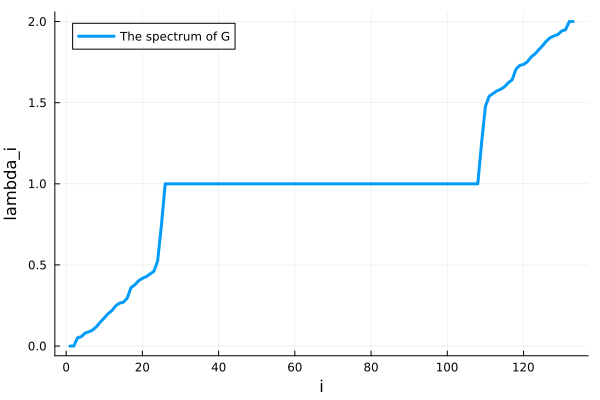

In [12]:
#computing and plotting the spectrum

E = eigen(L)
λ = E.values
P = plot(λ, label = "The spectrum of G",
             linewidth = 3,
             xlab = "i",
             ylab = "lambda_i")

In [13]:
revλ = sort(2 .-λ)

133-element Vector{Float64}:
 -4.440892098500626e-16
  0.0
  0.05069343756818512
  0.05824578391481028
  0.08047496806537846
  0.0881901234316338
  0.09961238618171064
  0.12011064366922097
  0.1483932330143065
  0.17336112069532272
  ⋮
  1.8516067669856933
  1.879889356330779
  1.900387613818288
  1.9118098765683669
  1.9195250319346209
  1.9417542160851902
  1.9493065624318153
  1.9999999999999947
  1.9999999999999982

In [14]:
#investigating symmetry of the spectrum around 1 (check Sheet 5!)
count(abs.(λ .- revλ) .< 10^(-14)), n

(133, 133)

In [15]:
#studying the biggest connected component H
C = connected_components(G)
k = findmax(length.(C))
I = C[k[2]]
H = Graph(A[I, I])

{130, 172} undirected simple Int64 graph

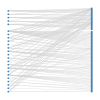

In [16]:
layout = (zeros(n), zeros(n))
height = max(length(pages), length(categories))
for i = 1:length(pages)
        layout[1][i] = 10
        layout[2][i] = i / length(pages) * height
end
for j = 1:length(categories)
        layout[1][j + length(pages)] = 50
        layout[2][j + length(pages)] = j / length(categories) * height
end
layout_H = (layout[1][I], layout[2][I])
P2 = gplot(H, layout_H...;
        nodelabeldist=2,
        nodefillc = colorant"steelblue"
)

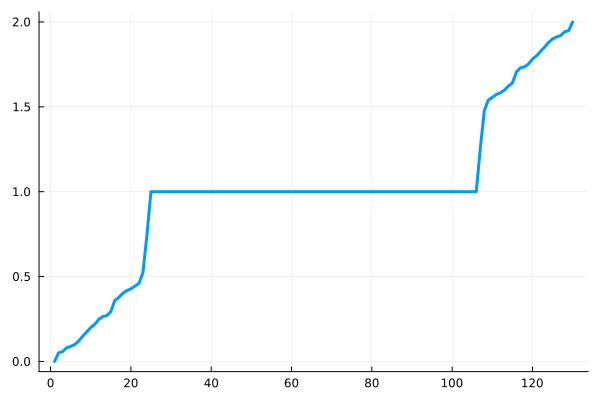

In [17]:
L_H = L[I,I]
E_H = eigen(L_H)
λ_H = E_H.values
plot(λ_H, legend = false, linewidth = 3)

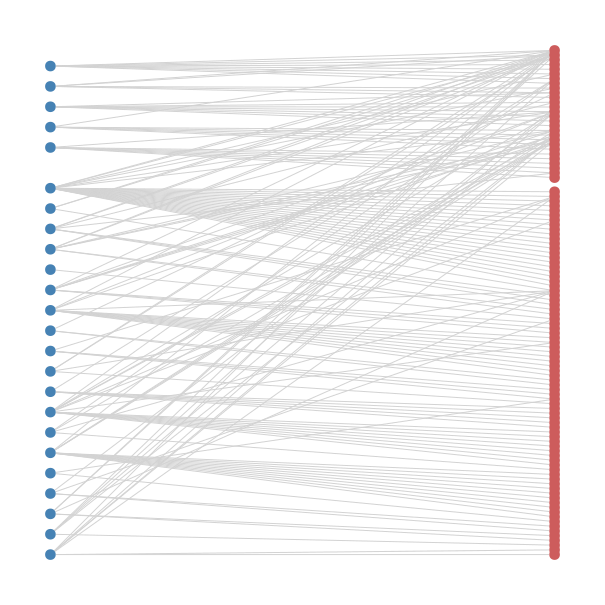

In [ ]:
using Compose, Cairo, Fontconfig, IJulia, FileIO, Images

#finding the bipartition of H via the eigenvector associated with 2
u = E_H.vectors[:,end]
cols = []
for uᵢ in u
    if abs(uᵢ) > 1e-12 
        if uᵢ < 0
            push!(cols, colorant"steelblue")
        else
            push!(cols, colorant"indianred")
        end
    else
        push!(cols, colorant"orange")
    end
end
P3 = gplot(H, layout_H...;
        nodelabeldist=2,
        nodefillc = cols
)
# saving the plot to disk and loading it from disk prevents VSCode display issue
imagePath = joinpath(dirname(pwd()), "img", environmentName, "bipartiton_of_H.png")
draw(PNG(imagePath, 16cm, 16cm), P3)
IJulia.display(load(imagePath))